# Using *pymt_gridmet*: with parameters

Start by importing the GridMet class from `pymt` and creating an instance.

In [1]:
from pymt.models import GridMet
m = GridMet()

Next, use the *setup* method to assign values to the `start_date` and `end_date` parameters.

In [2]:
args = m.setup(start_date="2021-01-01", end_date="2021-01-03")

Pass the results from *setup* into the *initialize* method.

In [3]:
m.initialize(*args)

gridmet.yaml
...



Note that the parameters have been correctly assigned in the component.

In [4]:
for param in m.parameters:
    print(param)

('start_date', '2021-01-01')
('end_date', '2021-01-03')


As in the previous example, get the maximum temperature values for the first day.

In [5]:
Tmax = m.var["daily_maximum_temperature"]
Tmax_values = Tmax.data

To make this example a little more interesting, let's visualize the maximum temperature data.

The *pymt_gridmet* component contains not only data values, but also the grid on which they're located.
Start by getting the identifier for the grid used for the maximum temperature data.

In [6]:
gid = m.var_grid("daily_maximum_temperature")

Using the grid identifier, we can get the grid dimensions, origin, and node spacing.

In [7]:
shape = m.grid_shape(gid)
origin = m.grid_origin(gid)
spacing = m.grid_spacing(gid)
print("shape:", shape)
print("origin:", origin)
print("spacing:", spacing)

shape: [ 585 1386]
origin: [  25.06666667 -124.76666663]
spacing: [ 0.04166667  0.04166667]


From these values, we can construct latitude and longitude vectors.

In [8]:
import numpy as np

lat = np.arange(shape[0])*spacing[0] + origin[0]
lon = np.arange(shape[1])*spacing[1] + origin[1]

We're almost ready to make a plot.
Note, however, that the default behavior of `pymt` components is to flatten data arrays.

In [9]:
Tmax_values.shape

(810810,)

Make a new variable that restores the dimensionality of the data.

In [10]:
Tmax_values_2D = Tmax_values.reshape(shape)
Tmax_values_2D.shape

(585, 1386)

Make a simple filled contour plot of the data with a colorbar. 

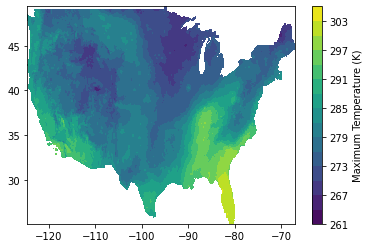

In [11]:
import matplotlib.pyplot as plt

plt.contourf(lon, lat, Tmax_values_2D, 15)
plt.colorbar(label="Maximum Temperature (K)")

Complete the example by finalizing the component.

In [12]:
m.finalize()